1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

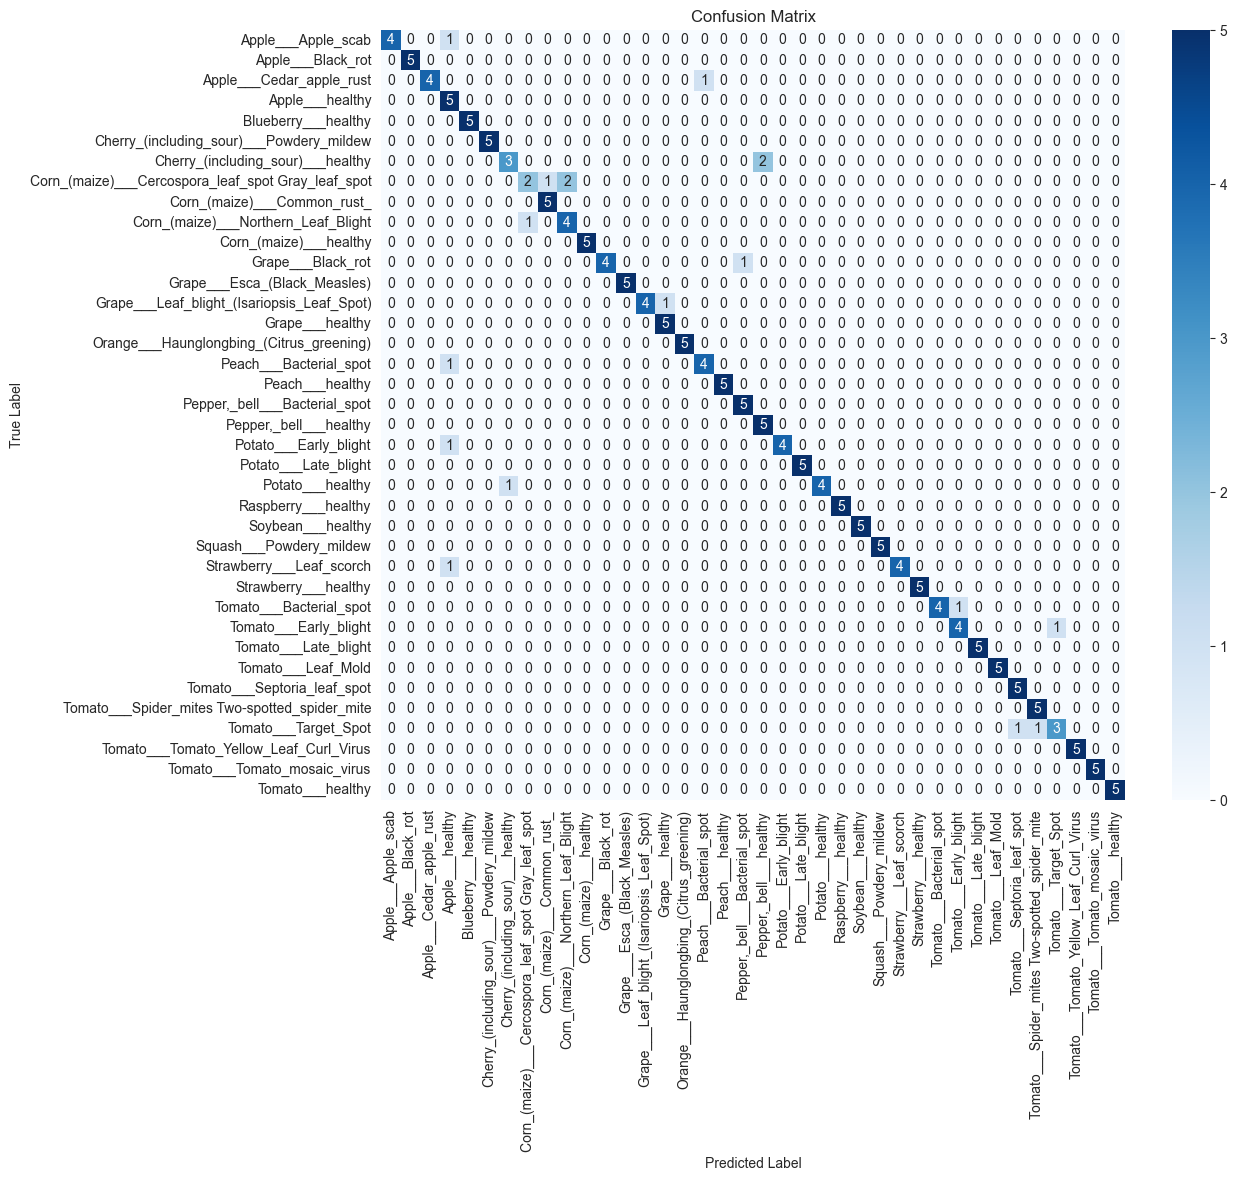


Classification Report:

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.80      0.89         5
                                 Apple___Black_rot       1.00      1.00      1.00         5
                          Apple___Cedar_apple_rust       1.00      0.80      0.89         5
                                   Apple___healthy       0.56      1.00      0.71         5
                               Blueberry___healthy       1.00      1.00      1.00         5
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00         5
                 Cherry_(including_sour)___healthy       0.75      0.60      0.67         5
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.67      0.40      0.50         5
                       Corn_(maize)___Common_rust_       0.83      1.00      0.91         5
               Corn_(maize)___Northern_Leaf_Blight    

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Configurazione
DATA_DIR = 'color'  # Percorso del dataset
MODEL_PATH = 'plant_disease_model_created.keras'  # Percorso del modello
IMG_SIZE = 224
MAX_IMAGES_PER_CLASS = 5

# Caricamento del modello
model = tf.keras.models.load_model(MODEL_PATH)

# Preparazione dei dati per la predizione
all_data_dir = os.path.join(DATA_DIR)
class_dirs = sorted(os.listdir(all_data_dir))

# Collezione dei risultati
y_true = []
y_pred = []

for class_index, class_name in enumerate(class_dirs):
    class_dir = os.path.join(all_data_dir, class_name)
    images = sorted(os.listdir(class_dir))[:MAX_IMAGES_PER_CLASS]

    for image_name in images:
        image_path = os.path.join(class_dir, image_name)

        # Caricamento e preprocessamento dell'immagine
        test_image = tf.keras.utils.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
        test_image = tf.keras.utils.img_to_array(test_image) / 255.0
        test_image = tf.expand_dims(test_image, axis=0)

        # Predizione
        result = model.predict(test_image, batch_size=1)[0]
        predicted_index = np.argmax(result)

        # Salva i risultati
        y_true.append(class_name)
        y_pred.append(class_dirs[predicted_index])

# Calcolo della matrice di confusione
cm = confusion_matrix(y_true, y_pred, labels=class_dirs)

# Visualizzazione della matrice di confusione
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_dirs, yticklabels=class_dirs)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.show()

# Report di classificazione
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_dirs))


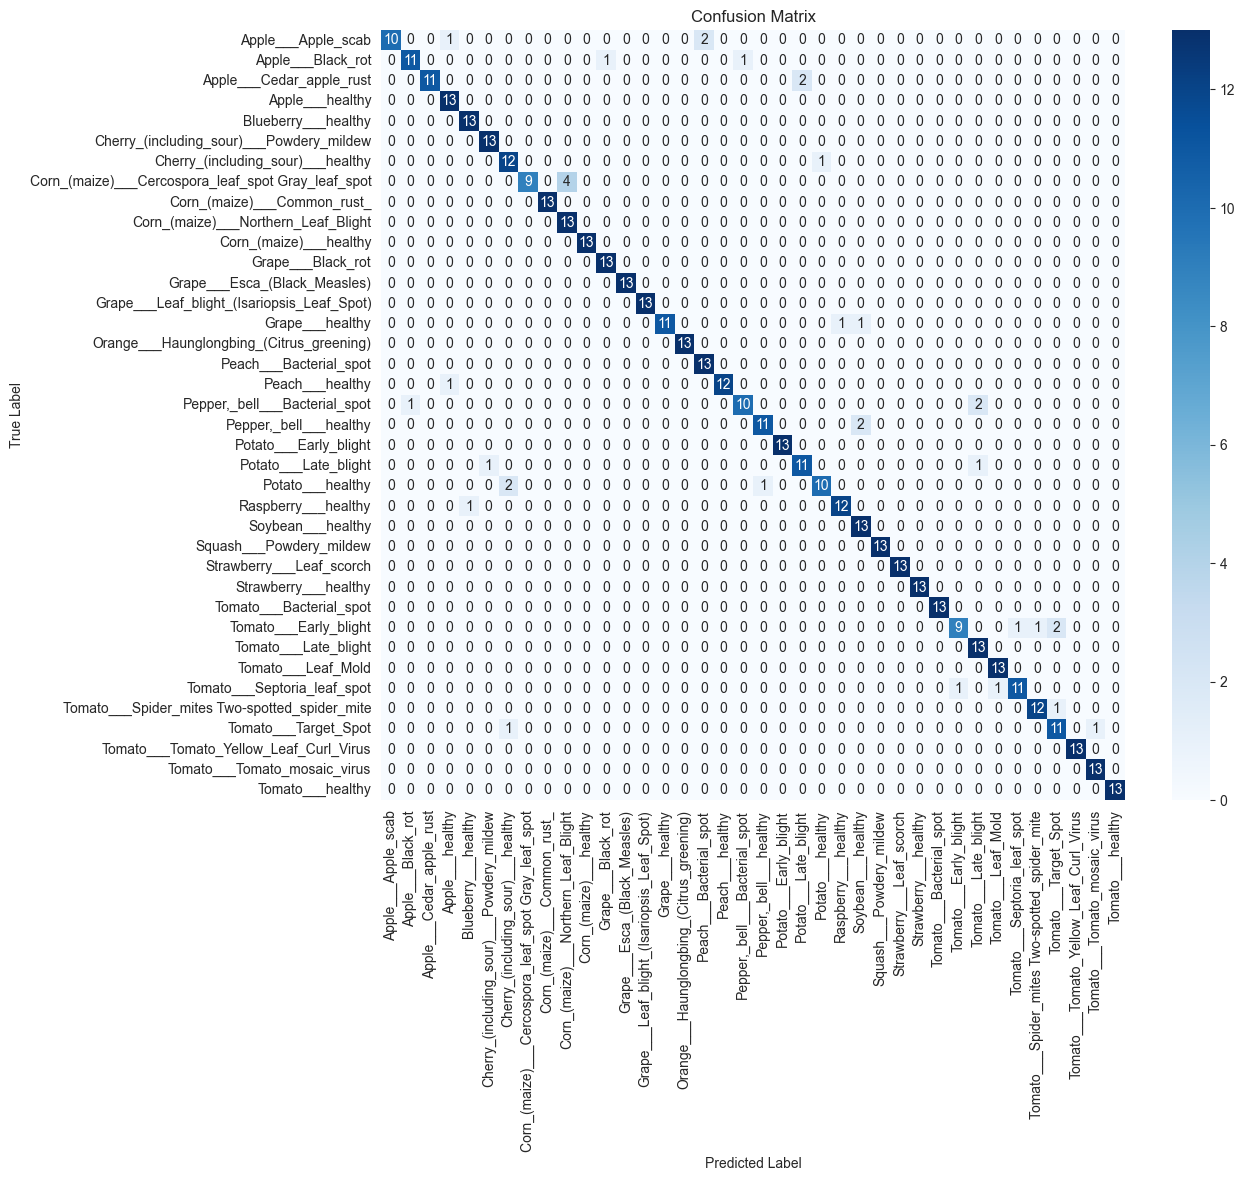


Classification Report:

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.77      0.87        13
                                 Apple___Black_rot       0.92      0.85      0.88        13
                          Apple___Cedar_apple_rust       1.00      0.85      0.92        13
                                   Apple___healthy       0.87      1.00      0.93        13
                               Blueberry___healthy       0.93      1.00      0.96        13
          Cherry_(including_sour)___Powdery_mildew       0.93      1.00      0.96        13
                 Cherry_(including_sour)___healthy       0.80      0.92      0.86        13
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      0.69      0.82        13
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00        13
               Corn_(maize)___Northern_Leaf_Blight    

In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import random

# Configurazione
DATA_DIR = 'color'  # Percorso del dataset
MODEL_PATH = 'plant_disease_model_created.keras'  # Percorso del modello
IMG_SIZE = 224
TOTAL_IMAGES = 500  # Numero totale di immagini per il campione bilanciato

# Caricamento del modello
model = tf.keras.models.load_model(MODEL_PATH)

# Preparazione dei dati
all_data_dir = os.path.join(DATA_DIR)
class_dirs = sorted(os.listdir(all_data_dir))

# Collezione delle immagini per classe
class_images = {}
for class_name in class_dirs:
    class_dir = os.path.join(all_data_dir, class_name)
    images = [os.path.join(class_dir, img) for img in os.listdir(class_dir)]
    class_images[class_name] = images

# Calcolo delle immagini per classe nel campione bilanciato
num_classes = len(class_dirs)
images_per_class = TOTAL_IMAGES // num_classes

# Selezione casuale e bilanciata delle immagini
y_true = []
y_pred = []

for class_name, images in class_images.items():
    sampled_images = random.sample(images, min(len(images), images_per_class))

    for image_path in sampled_images:
        # Caricamento e preprocessamento dell'immagine
        test_image = tf.keras.utils.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
        test_image = tf.keras.utils.img_to_array(test_image) / 255.0
        test_image = tf.expand_dims(test_image, axis=0)

        # Predizione
        result = model.predict(test_image, batch_size=1, verbose=0)[0]
        predicted_index = np.argmax(result)

        # Salva i risultati
        y_true.append(class_name)
        y_pred.append(class_dirs[predicted_index])

# Calcolo della matrice di confusione
cm = confusion_matrix(y_true, y_pred, labels=class_dirs)

# Visualizzazione della matrice di confusione
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_dirs, yticklabels=class_dirs)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.show()

# Report di classificazione
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_dirs))


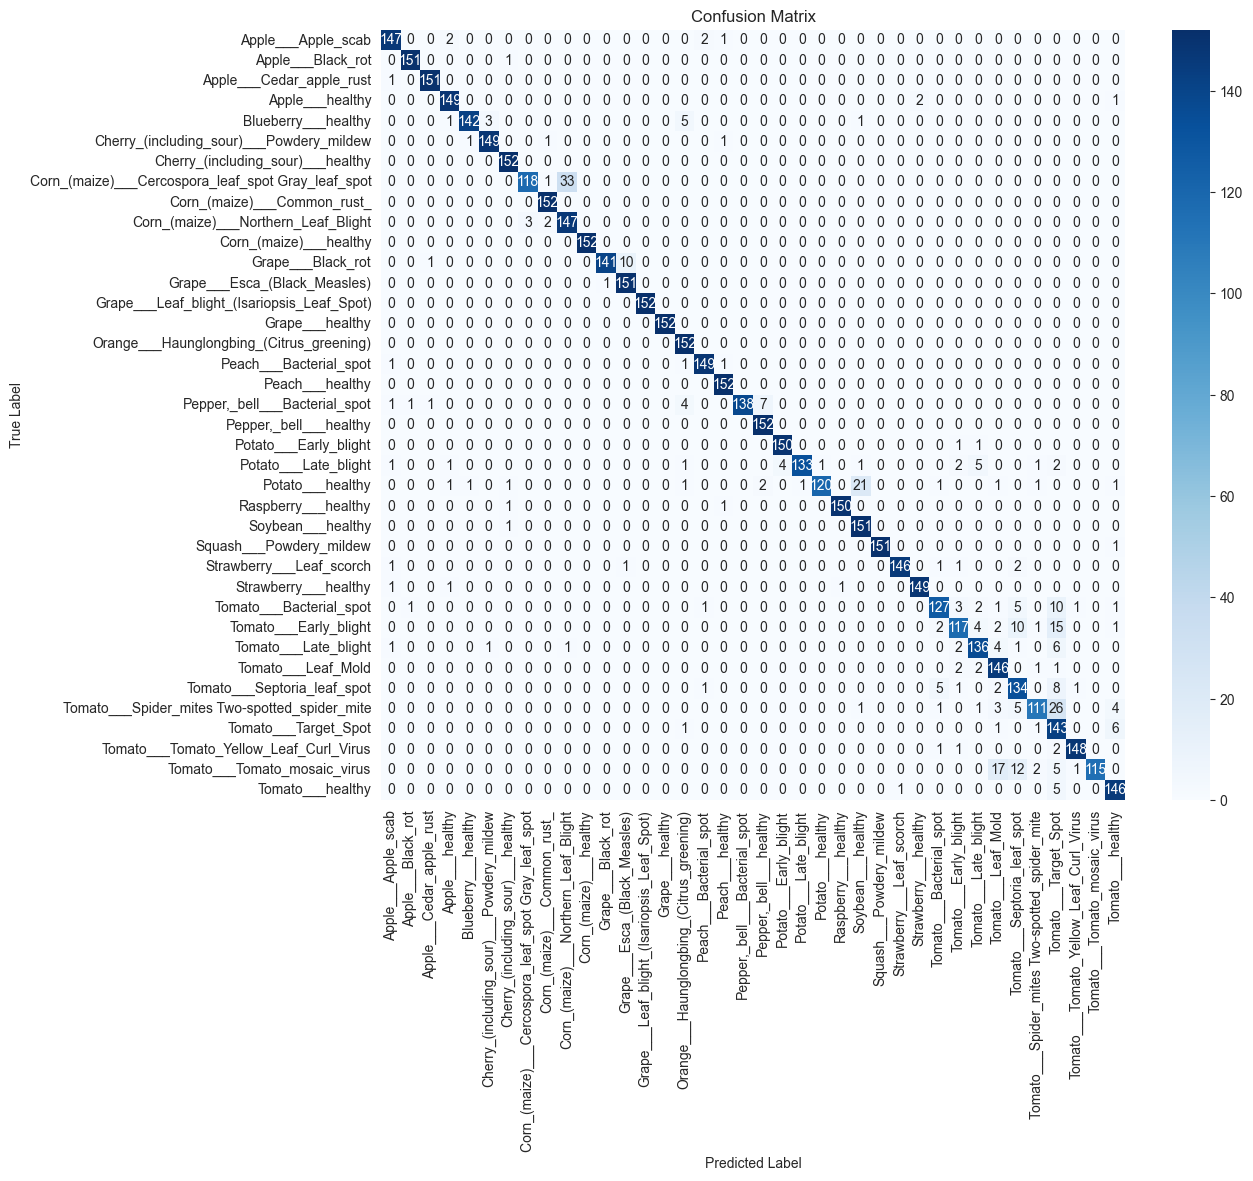


Classification Report:

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.97      0.96       152
                                 Apple___Black_rot       0.99      0.99      0.99       152
                          Apple___Cedar_apple_rust       0.99      0.99      0.99       152
                                   Apple___healthy       0.96      0.98      0.97       152
                               Blueberry___healthy       0.99      0.93      0.96       152
          Cherry_(including_sour)___Powdery_mildew       0.97      0.98      0.98       152
                 Cherry_(including_sour)___healthy       0.97      1.00      0.99       152
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.78      0.86       152
                       Corn_(maize)___Common_rust_       0.97      1.00      0.99       152
               Corn_(maize)___Northern_Leaf_Blight    

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import random

# Configurazione
DATA_DIR = 'color'  # Percorso del dataset
MODEL_PATH = 'plant_disease_model_mobile.keras'  # Percorso del modello
IMG_SIZE = 224
TOTAL_IMAGES = 7500  # Numero totale di immagini per il campione bilanciato

# Caricamento del modello
model = tf.keras.models.load_model(MODEL_PATH)

# Preparazione dei dati
all_data_dir = os.path.join(DATA_DIR)
class_dirs = sorted(os.listdir(all_data_dir))

# Collezione delle immagini per classe
class_images = {}
for class_name in class_dirs:
    class_dir = os.path.join(all_data_dir, class_name)
    images = [os.path.join(class_dir, img) for img in os.listdir(class_dir)]
    class_images[class_name] = images

# Calcolo del massimo bilanciamento considerando le immagini disponibili
num_classes = len(class_dirs)
available_images_per_class = {class_name: len(images) for class_name, images in class_images.items()}
images_per_class = min(TOTAL_IMAGES // num_classes, min(available_images_per_class.values()))

# Selezione casuale e bilanciata delle immagini
y_true = []
y_pred = []

for class_name, images in class_images.items():
    sampled_images = random.sample(images, min(len(images), images_per_class))

    for image_path in sampled_images:
        # Caricamento e preprocessamento dell'immagine
        test_image = tf.keras.utils.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
        test_image = tf.keras.utils.img_to_array(test_image) / 255.0
        test_image = tf.expand_dims(test_image, axis=0)

        # Predizione
        result = model.predict(test_image, batch_size=1, verbose=0)[0]
        predicted_index = np.argmax(result)

        # Salva i risultati
        y_true.append(class_name)
        y_pred.append(class_dirs[predicted_index])

# Calcolo della matrice di confusione
cm = confusion_matrix(y_true, y_pred, labels=class_dirs)

# Visualizzazione della matrice di confusione
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_dirs, yticklabels=class_dirs)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.show()

# Report di classificazione
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_dirs))
